# Machine Learning II
# Density Based Spatial Clustering of Applications with Noise (D.B.S.C.A.N)




# Course part



**professor**: TAY Ahmad

## Table des matières
- [Introduction](#introduction)
- [Quoi, pourquoi et quand](#quoi-pourquoi-et-quand)
- [Détails théoriques](#détails-théoriques)
- [Avantages et inconvénients](#avantages-et-inconvénients)
- [Comparaison](#comparaison)

## Introduction

DBSCAN qui vient de l’anglais "Density-based spatial clustering of applications with noise". Ce qui donnerait en français : "Clustering spatial basé sur la densité d’une application avec du bruit".

Il a été proposé en 1996 par Martin Ester, Hans-Peter Kriegel, Jörg Sander et Xiaowei Xu. Nous connaissons beaucoup d’algorithmes de clustering mais le DBSCAN est « la méthode d'apprentissage non supervisée la plus utilisée parmi les méthodes de classification par densité ».

Mais avant de rentrer plus dans les détails, il est intéressant de comprendre pourquoi cet algorithme a été créé.

## Quoi, pourquoi et qu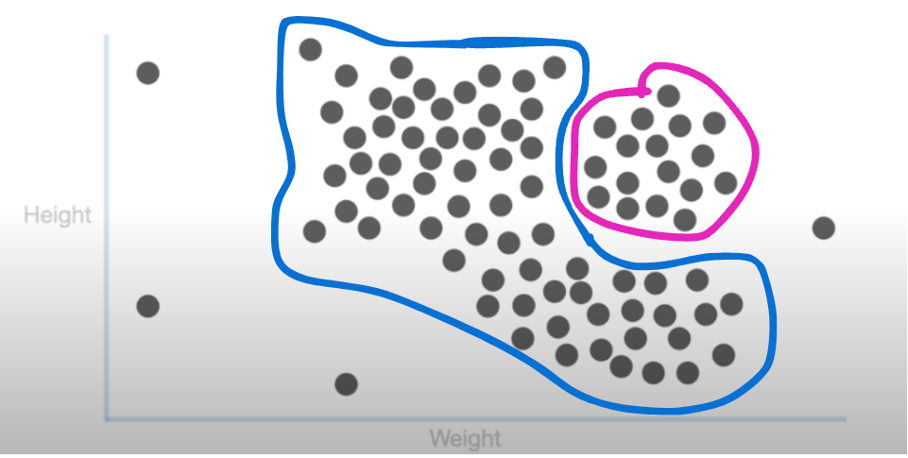and

Prenons l’exemple suivant :

Imaginons qu’on ait un dataset représentant une population et qu’on ait les deux informations suivantes pour chacun des individus : la taille et le poids. Si nous représentons cela en dimension, on aurait le nuage de points suivant :

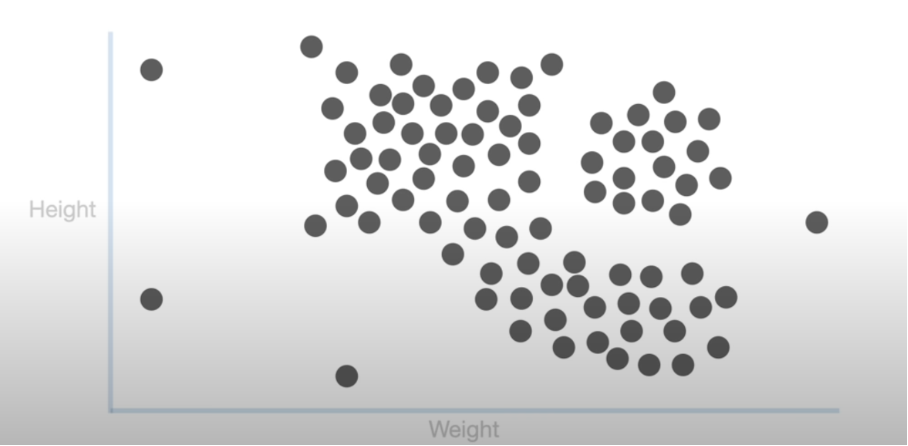

Ici visuellement nous sommes directement capables de distinguer les deux clusters :

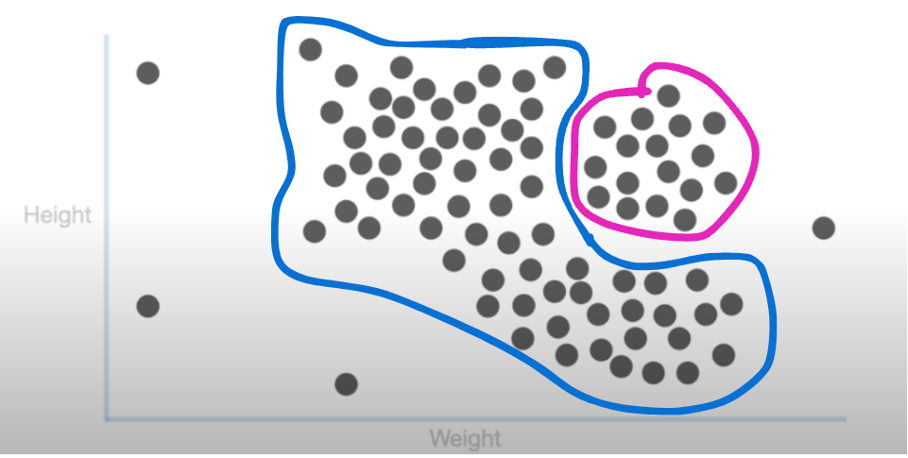

Cependant, le test a été fait et si nous appliquons l’algorithme de Kmeans dessus, voici le résultat qu’on obtient :

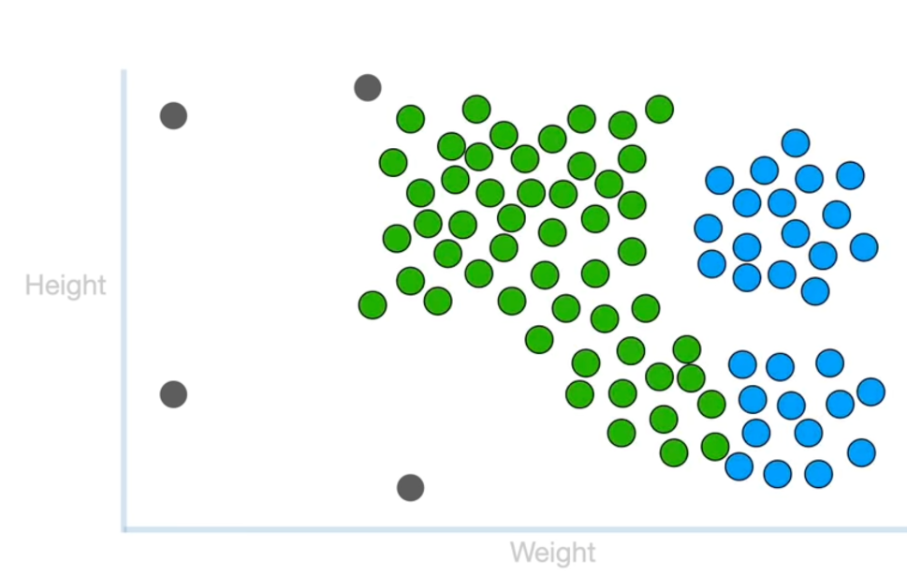

On voit que le comportement ou les clusters de points n'ont pas été bien reconnus par l'algorithme K-means car il s'agit de ce qu'on appelle un « nested cluster » ou en français cluster imbriqué.

Voici d’autres exemples pour comprendre la différence entre Kmeans et DBSCAN :

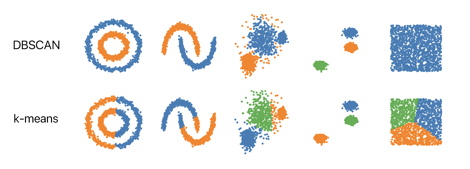

## Détails théoriques

Mais alors comment ça marche ?

Notre ensemble de points de départ va être divisé en 3 types :

### Core points

On doit d’un point qu’il est un point central si « son voisinage est dense » c’est-à-dire qu’il est entouré de points. Par exemple, ici les deux points rouges sont des points centraux.

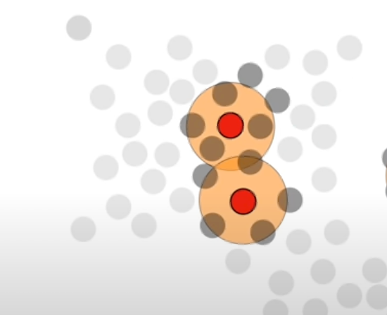

### Border points

On dit d’un point qu’il est un point de frontière si ce n’est pas un point central et qu’il appartient au voisinage d’au moins un point central. Par exemple, les points noirs ici sont dits points de frontière car ils sont dans le voisinage de points rouges mais que leur propre voisinage n’est pas dense. Ils sont généralement aux extrémités d’un cluster d’où le nom : point de frontière.

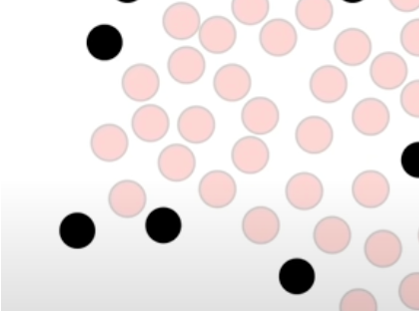

### Noise points

On dit d’un point qu’il est aberrant si ce n’est ni un point central ni un point de frontière. C’est-à-dire qu’il n’a aucun point dans son voisinage.

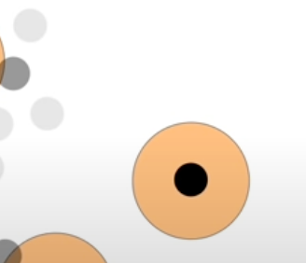

Une fois cette étape faite, parmi les points centraux il y en aura un qui sera choisi comme premier point du premier cluster et l'ensemble des points centraux de son voisinage seront transformés en points de ce cluster. La même chose sera faite pour nos nouveaux points de cluster. Les points de frontières seront également transformés en points de cluster ; cependant ils ne transmettront pas leurs points voisins dans le cluster à leur tour. Une fois l'ensemble des points de ce cluster traités, un nouveau cluster sera formé avec un nouveau point central (en bleu).

Ainsi nous obtenons le résultat final :

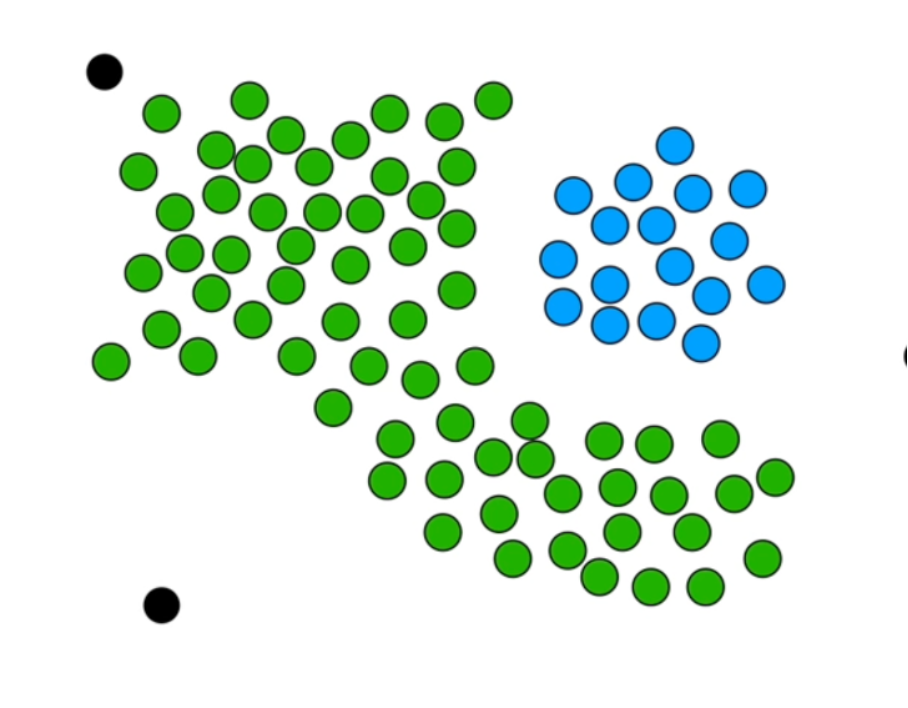

Ainsi ici nous pouvons voir que la forme des clusters originaux a bien été respectée ainsi l’algorithme d’apprentissage a été capable de comprendre la forme des clusters.

De plus les outliers ou le « bruit » ont bien été ignorés dans le clustering comme le sous-entend le nom de cet algorithme : Clustering spatial basé sur la densité d’une application avec du bruit.

### Mais alors mathématiquement comment ça marche ?

Si nous souhaitons réaliser un algorithme de DBSCAN il y a deux paramètres principaux à initialiser : ε et MinPts.

ε correspond à la distance qui va nous permettre de définir la nature d’un point. On peut aussi appeler cela la distance de voisinage. Ainsi plus epsilon est grand plus il faudra que les points soient rapprochés pour être considérés comme points centraux.

MinPts correspond au minimum de points qu’il faut dans un voisinage de taille epsilon pour considérer qu’un point est un point central. Dans l’exemple de la photo MinPts est égal à 4 ; ainsi le point rouge a seulement 3 points dans son voisinage c’est donc un point de bordure tandis que le point vert en a 6 c’est donc un point central.

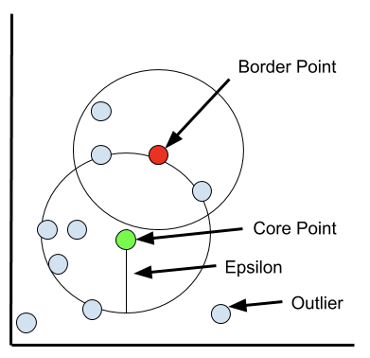

Pour calculer la distance entre deux points et ainsi voir si elle est inférieure/égale ou supérieure à un autre point on utilise la distance euclidienne. 

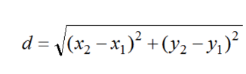

Jusqu’à présent on a uniquement pris des exemples en deux dimensions mais cet algorithme s’applique aussi très bien sur un ensemble à n dimensions. Nous utiliserions alors la formule : Soit p = (p1….pn) et q = (q1….qn) :

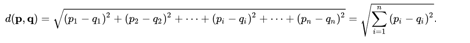

Ainsi le but est d’abord de choisir un point aléatoirement et de calculer la distance entre ce point et l’ensemble des points du dataset. Si on trouve plus que MinPts alors on considère ce point comme le point de départ de notre dataset. S’il s’agit d’un point de bruit ou d’un point de frontière alors ce point sera ignoré et on passera à un autre point. Une fois le premier point de cluster trouvé, on va lui attribuer le label 1 par exemple pour le premier cluster. Ensuite, on va aller sur tous les points qui ont été considérés comme points de son voisinage vérifier qu’il s’agit de points centraux et ainsi de suite jusqu’à ce que tous les points centraux et les points de frontière du cluster aient été traités.

## Avantages et inconvénients

Parmi les avantages du DBSCAN, on a vu qu’il était excellent pour détecter les nested clusters. Il permet également de gérer les outliers car il ne les prend pas en compte dans son clustering. Aussi, à la différence du K-means par exemple, il n’est pas nécessaire de choisir la valeur de K c’est-à-dire le nombre de clusters. Il va détecter par lui-même le nombre de clusters en fonction de epsilon et du nombre minimum de points.

Parmi les défauts, même si on ne choisit pas la valeur de K on doit choisir la valeur de epsilon et minpts. Il faut savoir que l’optimisation de ce modèle peut être très coûteuse en termes de puissance de calcul par exemple si on souhaite trouver la meilleure valeur d’epsilon pour une image avec une résolution de 1920x1080 pixels. Sinon en général à part le fait qu’il y ait besoin de faire beaucoup de calculs c’est un très bon algorithme de classification.

Cléophas Fournier M1 DAI


# DBSCAN FROM SCRATCH

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(20190627)

docs : https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=8, n_features=2,random_state=3)


# i choose to add noise because it's the purpose of dbscan to handle noise
E = np.random.uniform(-10,10,(40,2))
X = np.concatenate((X,E),axis=0)
y = np.concatenate((y,-np.ones(40))) # so from now, our noise points are labeled as -1


In [3]:
X[:10,:]

array([[ 3.75282179,  1.87176138],
       [ 7.23252458,  7.43381789],
       [-8.66179837, -0.41612759],
       [ 4.814411  ,  2.34770968],
       [ 8.11401978,  7.69436437],
       [-4.45650534,  0.65156136],
       [-9.28746085, -0.41572918],
       [-7.84573452, -6.50706264],
       [ 3.81650412, -3.01410741],
       [ 3.06257794, -4.07972161]])

In [4]:
y[:10]

array([7., 2., 5., 7., 2., 1., 4., 3., 6., 6.])

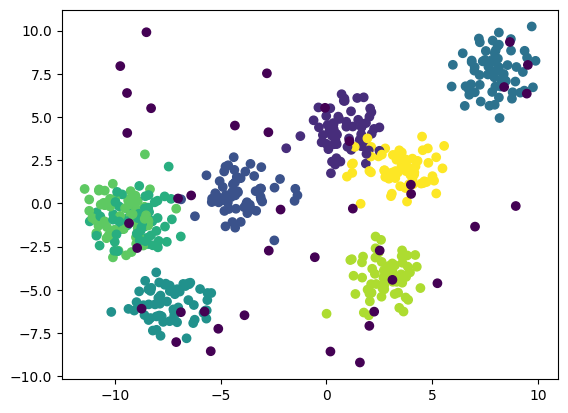

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

the purple point are the noise points we added manually

In [6]:
from scipy.spatial import distance
x1= (2,3)
x2= (3,5)
print(distance.euclidean(x1,x2))

2.23606797749979


In [7]:
len(X)

540

In [8]:
#lets do first a function that classify a point as core, border or noise   

def reduceddbscan(data,minpts,eps):
    labels = []
    for i in range(len(data)):
        neighbors = []

        for j in range(len(data)):
            if i != j:
                if distance.euclidean(data[i],data[j]) < eps:
                    #add j to neighborhood of data[i]
                    neighbors.append(j)
                
        if len(neighbors) >= minpts:
            labels.append('core')
        elif len(neighbors) == 0:
            labels.append('noise')
        else:
            labels.append('border')

    return labels  
        
labels = reduceddbscan(X,3,0.5)
len(labels)

540

so now we have a fonction that can, from a set of data classify them between core, noise and border

we can see that we have 200 labels so it match what we were looking for.

In [9]:
#to plot it we need to encode labels 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
le.classes_
encoded_labels = le.transform(labels)
encoded_labels[:10]

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

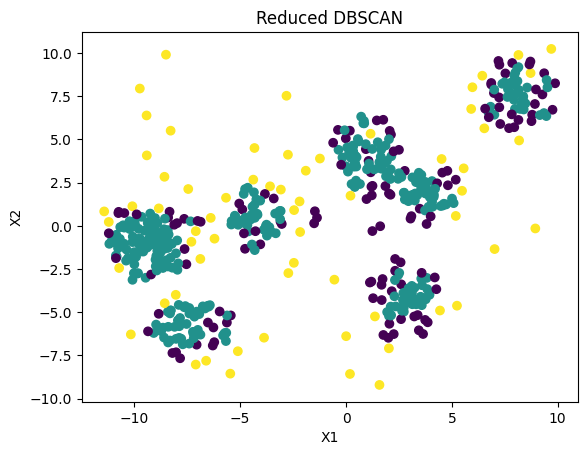

In [10]:
plt.scatter(X[:,0],X[:,1],c=encoded_labels)
plt.title('Reduced DBSCAN')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

It's not actually a real dbscan clustering but we can see how it's working. in blue we have core points, in purlpe we have border points and in yellow we have noise points.

now let's do a real dbscan algorithm

In [11]:
# first we will do a function thath find all the neighbors points in a dataset

def findneighbors(p,data,eps):
    #lets do first a function that classify a point as core, border or noise   

    neighbors = []

    for j in range(len(data)):
        if distance.euclidean(p, data[j]) < eps and distance.euclidean(p, data[j]) > 0: #i also put >0 to avoid self comparaison
                #add j to neighborhood of data[i]
                neighbors.append(j)
    return neighbors
 



the function findneigbors will be really helpfull to find the neighbors of a point in the dbscan algorithm

[118, 419, 484]
[21, 34, 40, 118, 141, 146, 191, 280, 294, 398, 419, 436, 451, 455, 482, 484, 491]


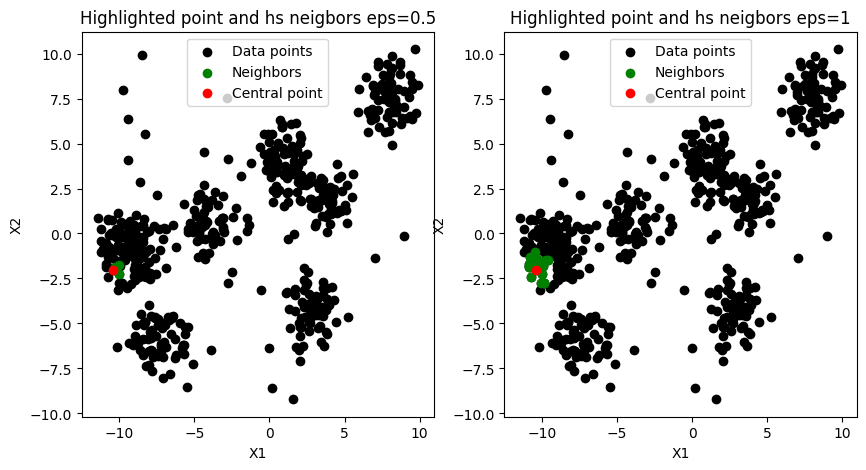

In [12]:
i=10
neighborstest_1= findneighbors(X[i],X,0.5)
neighborstest_2= findneighbors(X[i],X,1)

print(neighborstest_1)
print(neighborstest_2)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], label='Data points',color = 'black')
plt.scatter(X[neighborstest_1, 0], X[neighborstest_1, 1], color='green', label='Neighbors')
plt.scatter(X[i, 0], X[i, 1], color='red', label='Central point')
plt.title('Highlighted point and hs neigbors eps=0.5')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], label='Data points',color = 'black')
plt.scatter(X[neighborstest_2, 0], X[neighborstest_2, 1], color='green', label='Neighbors')
plt.scatter(X[i, 0], X[i, 1], color='red', label='Central point')
plt.title('Highlighted point and hs neigbors eps=1')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

here in the fig above we start from a central point choosed randomly, i choose the point with index 10. and we plot two case. case 1 when eps = 0.5 and case 2 when eps = 1. this help us understand the purpose of the eps parameter in the dbscan algorithm we cans ee that in the second case the neigborhood is bigger and we have more points in the neighborhood of the central point.

In [13]:
def formcluster(neighbors, p, labels, c, data, eps, minpts):
    labels[p] = c
    i = 0
    while i < len(neighbors):
        nextp = neighbors[i]
        if labels[nextp] == -1: 
            labels[nextp] = c
        elif labels[nextp] == 0:
            labels[nextp] = c
            nextneighbors = findneighbors(data[nextp], data, eps)
            if len(nextneighbors) >= minpts:
                neighbors += nextneighbors
        i += 1

    print(labels)
    return labels

this function using the findneighbors function will help us to create a dataset from a initial point

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

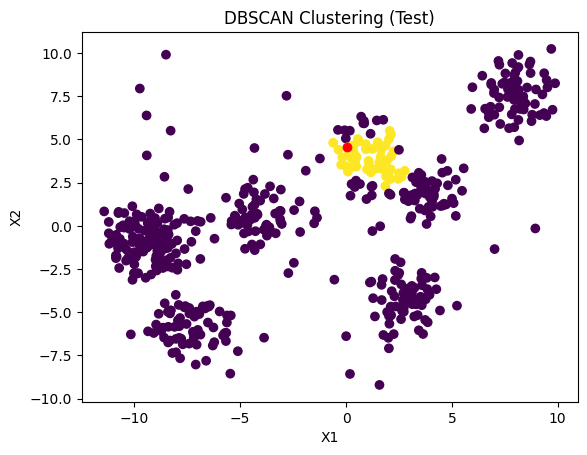

In [14]:
i = 63
eps = 0.5
minpts = 3
labels_test = [0] * len(X)

neighbors = findneighbors(X[i], X, eps)

cluster_id = 1
formcluster(neighbors, i, labels_test, cluster_id, X, eps, minpts)
#print the starting point
plt.scatter(X[:, 0], X[:, 1], c=labels_test)
plt.scatter(X[i, 0], X[i, 1], color='red')
plt.title('DBSCAN Clustering (Test)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

here's the result of the formcluster function so we start from a single core point (in red) and we start adding into the cluster the corepoint around

In [15]:
def dbscan(data,eps,minpts):
    labels = [0]*len(data)
    #the current cluster is :
    c=0
    for i in range(len(data)):
        #to know if a point has been visited or not, we will use the label table. actually all points are set to labels 0 but we will change the value after so if a point is indicated as 0 it means that it hasn't been visited yet
        if labels[i] != 0:
            continue
        neighbors = findneighbors(data[i],data,eps)
        if(len(neighbors)<minpts):
            labels[i]=-1
        else:
            #this mean that we have find ou first seed point, now we will grow our cluster
            c+=1
            formcluster(neighbors,i,labels,c,data,eps,minpts)
    return labels
            


finally here's our dbscan algorithm

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

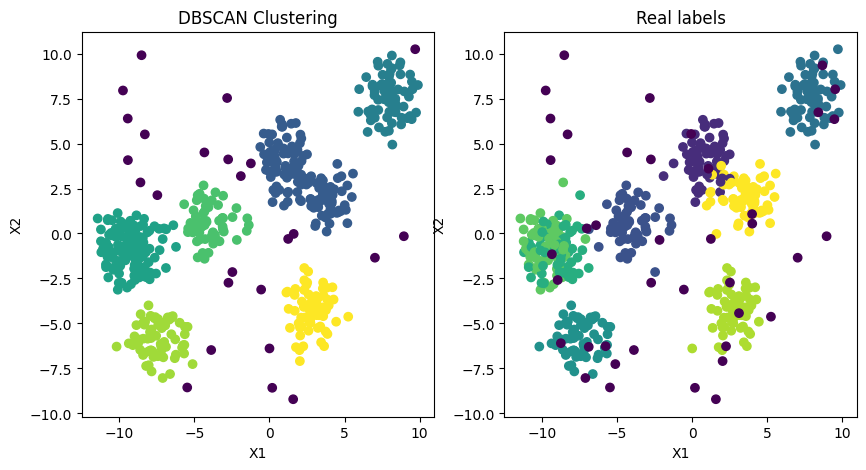

In [16]:
labels = dbscan(X,1,4)
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.title('DBSCAN Clustering')
plt.xlabel('X1')
plt.ylabel('X2')
plt.subplot(1,2,2)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('Real labels')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

we can see that there's 2 clusters that fusionned into one cluster but overall we have good result. also noise has been well handled !

# Difference between KMeans and DBSCAN
for this we will use sklearn datasets that gives us data with fun shapes

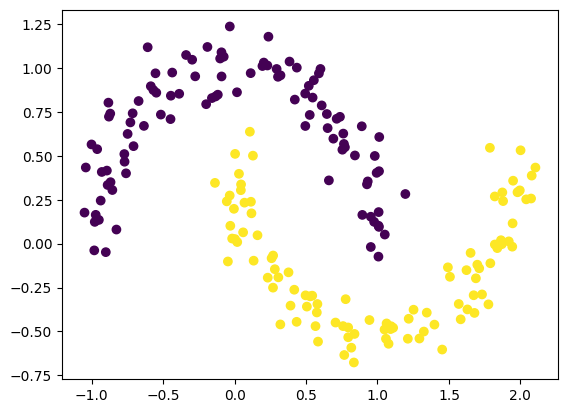

In [17]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200,noise=0.1)
plt.scatter(X[:,0],X[:,1],c=y)

In [18]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)


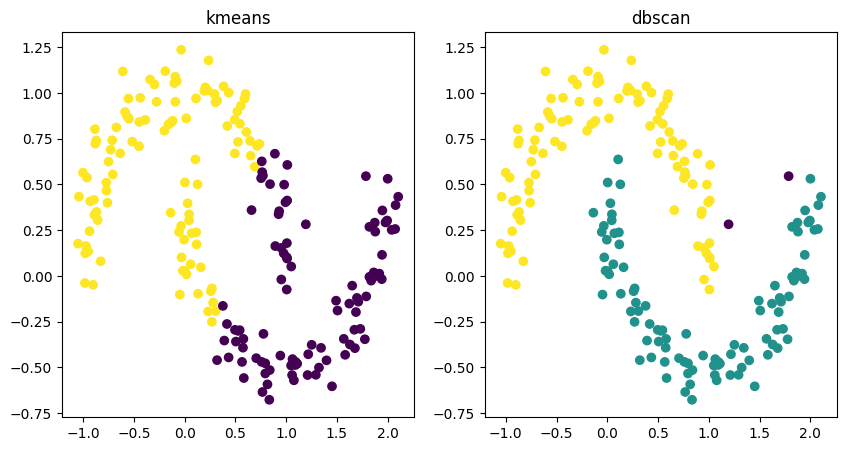

In [19]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.2, min_samples=2).fit(X)
clustering.labels_
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("kmeans")
plt.scatter(X[:,0],X[:,1],c=kmeans.labels_
)
plt.subplot(1,2,2)
plt.title("dbscan")
plt.scatter(X[:,0],X[:,1],c=clustering.labels_
)


in this case we can see that dbscan perfomed better than kmeans to understand the shape of the clusters

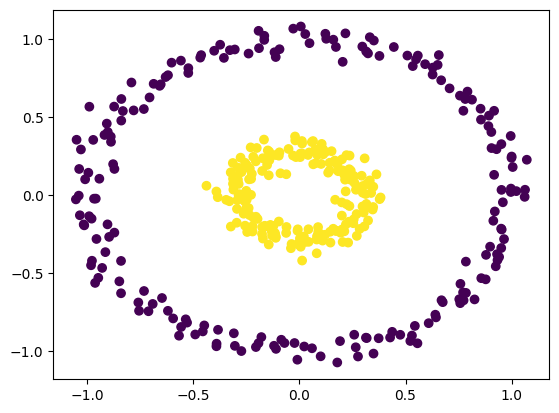

In [20]:
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=400, factor=.3, noise=.05)
plt.scatter(X[:,0],X[:,1],c=y)


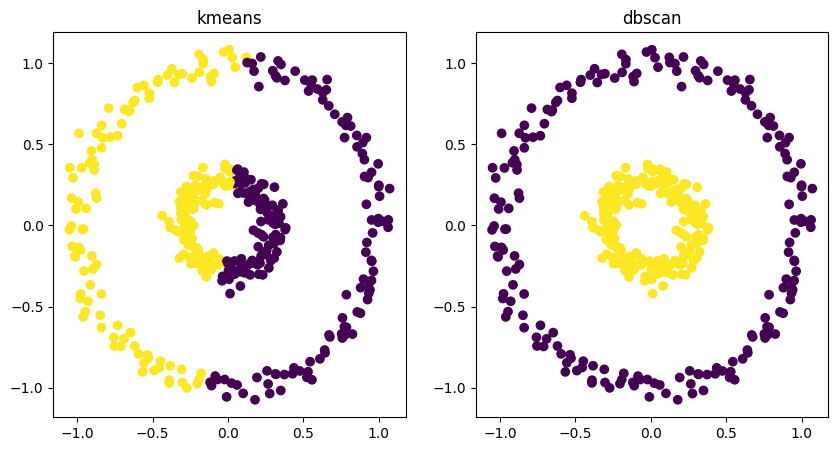

In [21]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
clustering = DBSCAN(eps=0.2, min_samples=2).fit(X)
clustering.labels_
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("kmeans")

plt.scatter(X[:,0],X[:,1],c=kmeans.labels_
)
plt.subplot(1,2,2)
plt.title("dbscan")

plt.scatter(X[:,0],X[:,1],c=clustering.labels_)

here we have the same conclusion. dbscan is better for nested clusters

# Image segmentation with DBSCAN

let's start with a simple one

In [22]:
import numpy as np
from PIL import Image
image = Image.open("DBSCAN/desert-road-on-night-cactus-260nw-2366487153.webp")
image_np = np.array(image)
height, width, channels = image_np.shape
image_np.shape

(280, 334, 3)

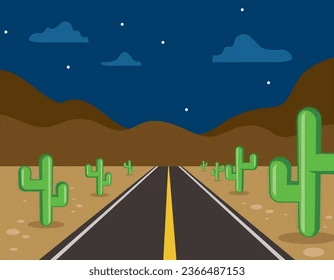

In [23]:
image

we call this image simple because object are distinct, color are different and the image is not in a good resolution

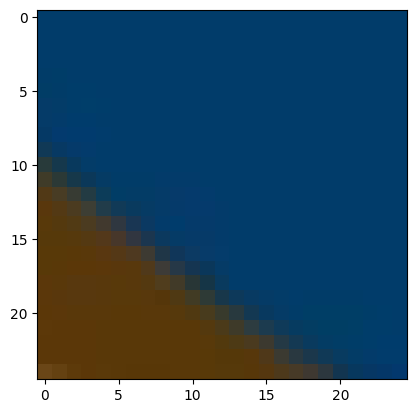

In [24]:
plt.imshow(image_np[100:125,100:125,:])


In [25]:
#to do a good clustering on an image we need to keep position of each pixel + colors to get a good clustering

X = []
for y in range(height):
    for x in range(width):
        r,g,b = image_np[y, x]
        X.append([r, g, b, x, y])

X = np.array(X)
X

array([[  1,  60, 106,   0,   0],
       [  1,  60, 106,   1,   0],
       [  1,  60, 106,   2,   0],
       ...,
       [255, 255, 255, 331, 279],
       [255, 255, 255, 332, 279],
       [255, 255, 255, 333, 279]])

In [26]:
db = DBSCAN(eps=10, min_samples=100).fit(X)
labels = db.labels_
unique_labels = np.unique(labels)
unique_labels 

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19])

In [27]:
label_image = labels.reshape(height, width)
label_image

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19],
       [19, 19, 19, ..., 19, 19, 19]])

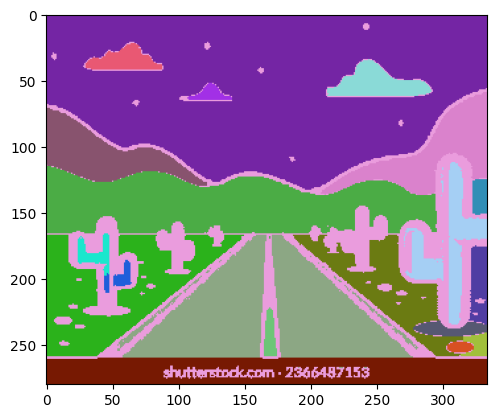

In [28]:
output_image = np.zeros((height, width, 3), dtype=np.uint8)
np.random.seed(20190627)
for label in unique_labels:
    mask = (label_image == label)
    color = np.random.randint(0, 255, 3)
    output_image[mask] = color

plt.imshow(output_image)
plt.show()

# How can we improve the DBSCAN algorithm ?
source : https://www.researchgate.net/publication/4028066_Color_image_segmentation_using_density-based_clustering

## Case : Do a clusterization on an Venise satellite image

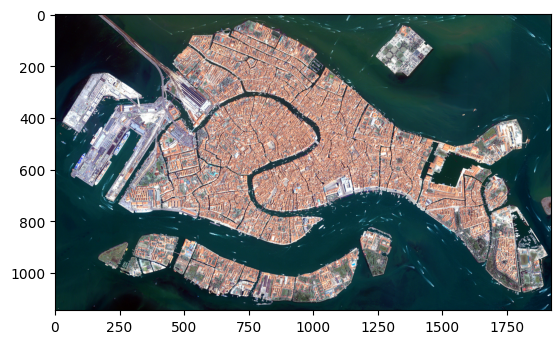

In [29]:
image = Image.open("DBSCAN/image.png")
plt.imshow(image)

In [30]:
image_np = np.array(image)


height, width, channels = image_np.shape
print(height, width, channels)

1145 1920 3


In [31]:
pixels = image_np.reshape(-1, 3)

X = []
for y in range(height):
    for x in range(width):
        r, g, b = image_np[y, x]
        X.append([r, g, b, x, y])

X = np.array(X)
X

array([[   9,    4,   11,    0,    0],
       [   8,    3,    9,    1,    0],
       [   8,    3,    7,    2,    0],
       ...,
       [   4,   32,   53, 1917, 1144],
       [   5,   42,   61, 1918, 1144],
       [   2,   30,   52, 1919, 1144]])

In [32]:
db = DBSCAN(eps=15, min_samples=550).fit(X)
labels = db.labels_

label_image = labels.reshape(height, width)
unique_labels = np.unique(labels)
unique_labels


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33])

In [33]:
len(unique_labels)


35

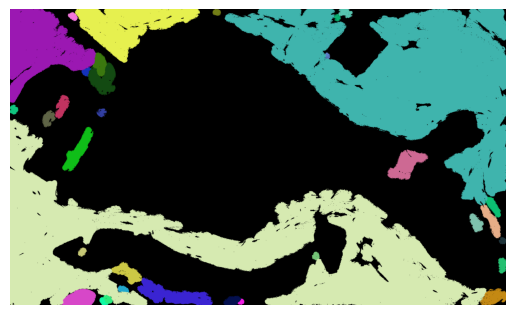

In [34]:
output_image = np.zeros((height, width, 3), dtype=np.uint8)

for label in unique_labels:
    if label == -1:
        continue  # Ignorer le bruit
    mask = (label_image == label)
    color = np.random.randint(0, 256, 3)  # Couleur aléatoire
    output_image[mask] = color

plt.imshow(output_image)
plt.axis('off')
plt.show()

here's the result for eps=15, min_samples=550 we can see that the image has been clustered but it's not really good. for example the sea around the city as been clustered in 4 differents clusters whereas it's the same object. also the city has been clustered a black meaning that it's noise. we can see that the result is not really good.


## The best value for eps
In order to do this we have 2 solutions. we can do it visually as i do by plotting a lot of value for eps and minpts but we can also do another method : the elbow method !

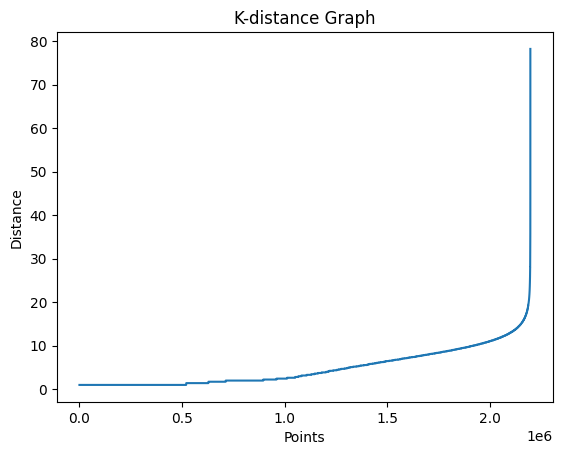

In [35]:
from sklearn.neighbors import NearestNeighbors
k=18
neigh = NearestNeighbors(n_neighbors=k)
neigh_fit = neigh.fit(X)
distances, indices = neigh_fit.kneighbors(X)

#now we sort them
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-distance Graph')
plt.show()

here we can say that a good value for eps is around 10

## The best value for MinPts
the empirical rule is to set MinPts = 2*dim where dim is the number of dimension of the dataset.


## Visual optimization

I will not put this code in my note book because it took around 20 minutes to run but i will put the code here :
    
```python
eps_values = [20, 18, 16, 14, 12, 10]
min_samples_values = [5, 7, 9, 11, 13, 15]

fig, axes = plt.subplots(len(eps_values), len(min_samples_values), figsize=(20, 20))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, eps in enumerate(eps_values):
    for j, min_samples in enumerate(min_samples_values):
        db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
        labels = db.labels_

        label_image = labels.reshape(height, width)
        unique_labels = np.unique(labels)
        
        output_image = np.zeros((height, width, 3), dtype=np.uint8)
        
        for label in unique_labels:
            if label == -1:
                continue  # Ignorer le bruit
            mask = (label_image == label)
            color = np.random.randint(0, 256, 3) # Couleur aléatoire
            output_image[mask] = color

        ax = axes[i, j]
        ax.imshow(output_image)
        ax.set_title(f"eps={eps}, min_samples={min_samples}")
        ax.axis('off')

plt.show()

```

the final result is 
<!-- ![result_comp.png](attachment:result_comp.png) -->
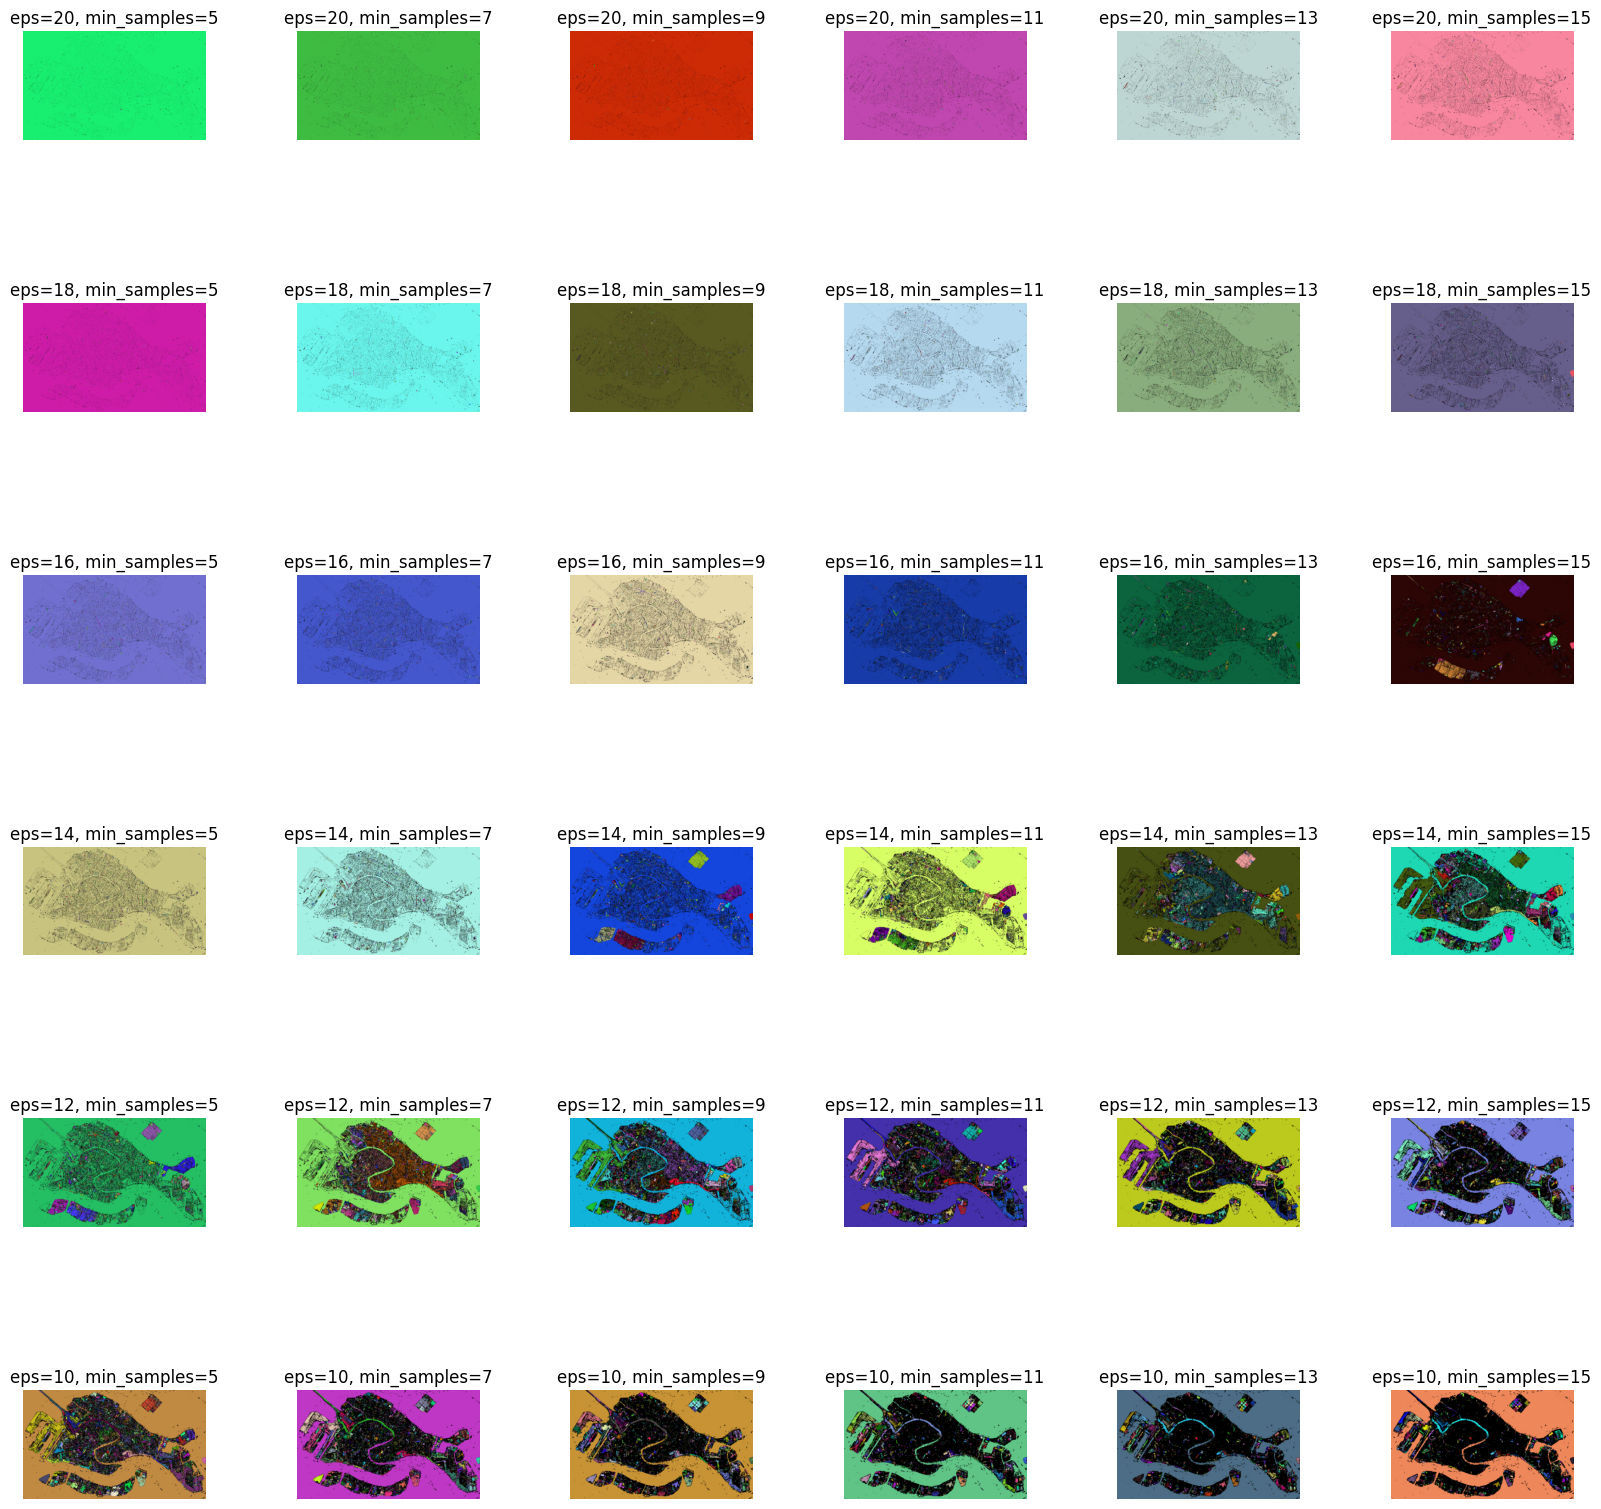

this allow us to better understand the impact of eps and min samples on the image segmentation with dbscan.

*Eps* : Epsilon define the radius of the neighborhood. If the eps value is too small, we will have a lot of noise points and small clusters. If the eps value is too big, we will have a lot of points in the same cluster giving at the end big cluster maybe for example merging to distinc cluster in one.

*Min_samples* : Min_samples define the minimum number of points that should be in a neighborhood to consider a point as a core/border or noise point. If the min_samples value is too big, we will have a lot of noise points and small clusters. If the min_samples value is too small, we will have a lot of points in the same cluster giving at the end big cluster.

here, visually we can say that the best value would be eps=10 and sample = 5

In order to be easier to do some test i will put all this process image code in a function

In [36]:
def process_image(image, eps, min_samples):
    image_np = np.array(image)
    height, width, channels = image_np.shape
    print(height, width, channels)
  
    X = []
    for y in range(height):
        for x in range(width):
            r, g, b = image_np[y, x]
            X.append([r, g, b, x, y])
    
    X = np.array(X)
    
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    
    label_image = labels.reshape(height, width)
    unique_labels = np.unique(labels)
    
    output_image = np.zeros((height, width, 3), dtype=np.uint8)
    
    for label in unique_labels:
        if label == -1:
            continue  
        mask = (label_image == label)
        color = np.random.randint(0, 256, 3)  
        output_image[mask] = color
    
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

## Apply a preprocessing to the image. For example a Gaussian filter

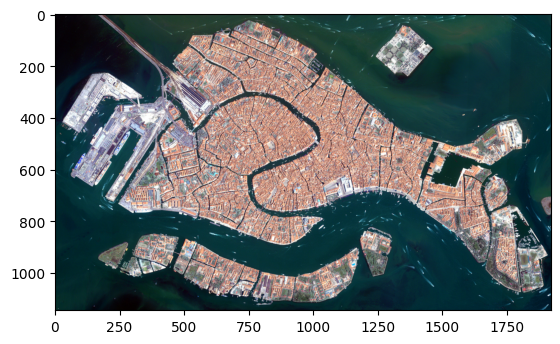

In [37]:
# apply guassian filter to image
from PIL import ImageFilter
image_gauss = Image.open("DBSCAN/image.png")
image_gauss = image_gauss.filter(ImageFilter.GaussianBlur(0.5)) 
plt.imshow(image_gauss)

1145 1920 3


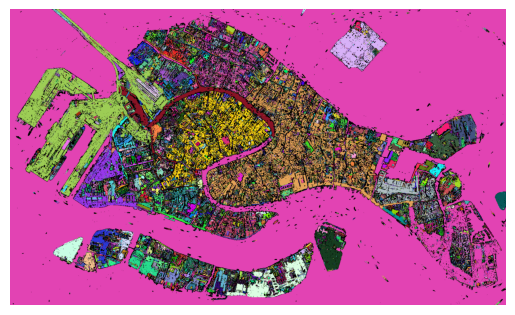

In [38]:
process_image(image_gauss,10,5)

Here we have a good result so we can see that gaussian blur is effective for dbscan image clustering. because it make the image more smooth. We can see that the sea around the city is now in the same cluster and the city is now in the same cluster too. we can see that the result is better than the previous one. for example the train station has been weel identified in purple !
but there's some improvement to do

## Scale the data

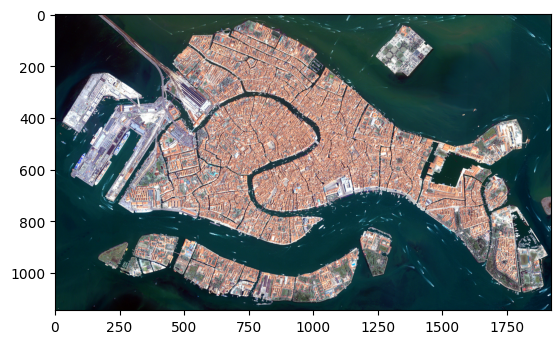

In [39]:
image_scale = Image.open("DBSCAN/image.png")
plt.imshow(image_scale)


In [40]:
image_scale_np = np.array(image_scale)


height, width, channels = image_scale_np.shape
print(height, width, channels)

1145 1920 3


In [41]:
X = []
for y in range(height):
    for x in range(width):
        r, g, b = image_scale_np[y, x]
        X.append([r, g, b, x, y])

X = np.array(X)
X

array([[   9,    4,   11,    0,    0],
       [   8,    3,    9,    1,    0],
       [   8,    3,    7,    2,    0],
       ...,
       [   4,   32,   53, 1917, 1144],
       [   5,   42,   61, 1918, 1144],
       [   2,   30,   52, 1919, 1144]])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("Données mises à l'échelle :")
print(X_scaled)

Données mises à l'échelle :
[[3.52941176e-02 1.56862745e-02 4.31372549e-02 0.00000000e+00
  0.00000000e+00]
 [3.13725490e-02 1.17647059e-02 3.52941176e-02 5.21104742e-04
  0.00000000e+00]
 [3.13725490e-02 1.17647059e-02 2.74509804e-02 1.04220948e-03
  0.00000000e+00]
 ...
 [1.56862745e-02 1.25490196e-01 2.07843137e-01 9.98957791e-01
  1.00000000e+00]
 [1.96078431e-02 1.64705882e-01 2.39215686e-01 9.99478895e-01
  1.00000000e+00]
 [7.84313725e-03 1.17647059e-01 2.03921569e-01 1.00000000e+00
  1.00000000e+00]]


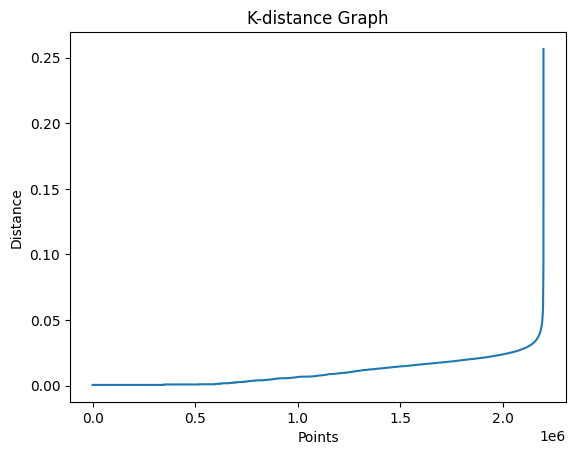

In [43]:
from sklearn.neighbors import NearestNeighbors
k=18
neigh = NearestNeighbors(n_neighbors=k)
neigh_fit = neigh.fit(X_scaled)
distances, indices = neigh_fit.kneighbors(X_scaled)

#now we sort them
distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.plot(distances)
plt.xlabel('Points')
plt.ylabel('Distance')
plt.title('K-distance Graph')
plt.show()

In [44]:
eps = 0.025  # Etant donné que les données sont mises à l'échelle entre 0 et 1
min_samples = 10

db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
labels_scale = db.labels_

print("Étiquettes de clusters :")
print(labels_scale)


Étiquettes de clusters :
[0 0 0 ... 0 0 0]


In [45]:
# np unique 
print(len(np.unique(labels_scale)))

3219


In [46]:
height, width, channels = image_np.shape
print(height, width, channels)
# because we ill need it to rescale our data

1145 1920 3


In [47]:
height = 1145  
width = 1920 
label_image = labels_scale.reshape(height, width)


In [48]:
label_image

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

Labels uniques :
[  -1    0    1 ... 3215 3216 3217]


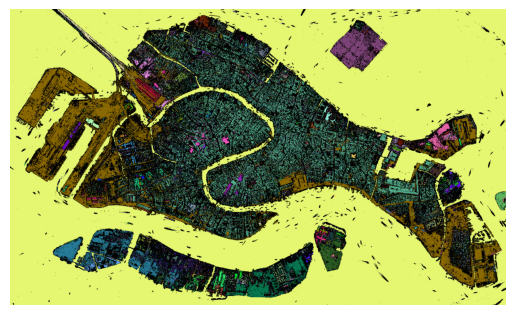

In [49]:
 


unique_labels_scale = np.unique(labels_scale)
print("Labels uniques :")
print(unique_labels_scale)

output_image = np.zeros((height, width, 3), dtype=np.uint8)

for label in unique_labels_scale:
    if label == -1:
        continue  # Ignorer le bruit
    mask = (label_image == label)
    color = np.random.randint(0, 256, 3)  # Couleur aléatoire
    output_image[mask] = color

plt.imshow(output_image)
plt.axis('off')
plt.show()


This result is really good. the whole sea and the river traversing Venice has been well clustered. we can see that the city is well clustered too.The train station is also well custerised. This is because scaling is really important when we are doing machine learning and specially when we deal with dimension not in the same range. here the position of the pixel go from 0 to 1920 (because of the image dimension), but the dimension of the color go from 0 to 255. so we need to scale the data to have a better result. 

## Use HUE instead of RGB

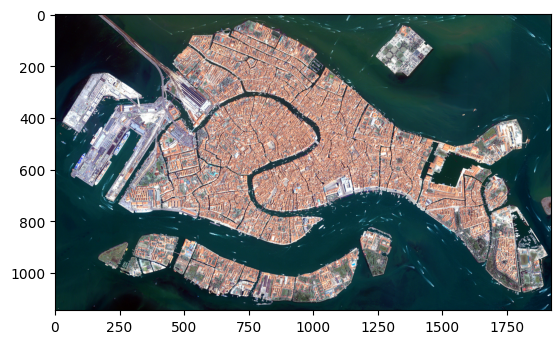

In [50]:
hue_image  = Image.open("DBSCAN/image.png")
plt.imshow(hue_image)

In [51]:
import cv2
image_hue = np.array(hue_image)
image_hue = cv2.cvtColor(image_hue, cv2.COLOR_RGB2HSV)

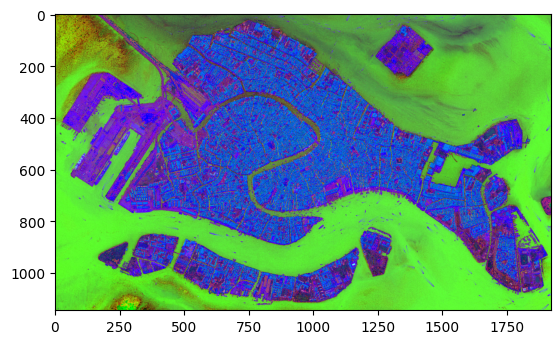

In [52]:
plt.imshow(image_hue)

In [53]:
hue = image_hue[:, :, 0]
saturation = image_hue[:, :, 1]
value = image_hue[:, :, 2]
print(hue)
print(saturation)
print(value)

[[141 145 156 ...  92  94  94]
 [145 145 156 ...  92  92  92]
 [156 156 173 ...  90  92  92]
 ...
 [ 83  86  88 ... 101  98  98]
 [ 83  84  89 ... 101  98  98]
 [ 87  87  88 ... 103 100 103]]
[[162 170 159 ... 169 171 164]
 [153 153 159 ... 175 169 166]
 [142 142 113 ... 175 172 170]
 ...
 [213 212 212 ... 244 232 227]
 [213 213 212 ... 249 249 255]
 [213 218 216 ... 236 234 245]]
[[11  9  8 ... 71 73 73]
 [10 10  8 ... 70 71 72]
 [ 9  9  9 ... 67 71 72]
 ...
 [48 47 47 ... 47 45 45]
 [48 48 47 ... 46 42 40]
 [49 48 46 ... 53 61 52]]


In [54]:
X = []
for y in range(height):
    for x in range(width):
        h = hue[y, x]
        s = saturation[y, x]
        v = value[y, x]
        X.append([h, s, v, x, y])

X = np.array(X)

In [55]:
db = DBSCAN(eps=10, min_samples=5).fit(X)
labels = db.labels_

label_image = labels.reshape(height, width)
unique_labels = np.unique(labels)

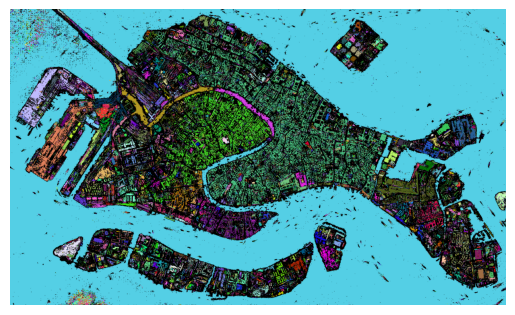

In [ ]:
output_image = np.zeros((height, width, 3), dtype=np.uint8)

for label in unique_labels:
    if label == -1:
        continue  
    mask = (label_image == label)
    color = np.random.randint(0, 256, 3)  
    output_image[mask] = color

plt.imshow(output_image)
plt.axis('off')
plt.show()

here we can see that using HUE for DBSCAN is also interesting because instead of using 3 dimension for the color we use only one. we can see that the result is really good.

## Now than we have learn how to optimize the DBSCAN algorithm, let's apply this all together 

In [ ]:
from PIL import ImageFilter
import cv2
from sklearn.preprocessing import MinMaxScaler





def process_image_optimized(image, eps, min_samples,gaussian_rate=0, hue=True,scale=True):
    original_image = image
    if gaussian_rate != 0 :
        image = image.filter(ImageFilter.GaussianBlur(gaussian_rate)) 
    

    image_np = np.array(image)

    if hue : 
        image_np = cv2.cvtColor(image_np, cv2.COLOR_RGB2HSV)

    height, width, channels = image_np.shape
    print(height, width, channels)
  
    X = []
    for y in range(height):
        for x in range(width):
            r, g, b = image_np[y, x]
            X.append([r, g, b, x, y])
    
    X = np.array(X)
    

    if scale :
        scaler = MinMaxScaler()
        X = scaler.fit_transform(X)
        
    # Perform DBSCAN clustering
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
    labels = db.labels_
    print(db)
    label_image = labels.reshape(height, width)

    unique_labels = np.unique(labels)
    
    output_image = np.zeros((height, width, 3), dtype=np.uint8)
    print(unique_labels)
    for label in unique_labels:
        if label == -1:
            continue  
        mask = (label_image == label)
        color = np.random.randint(0, 256, 3)  
        output_image[mask] = color

    plt.figure(figsize=(15,10))

    plt.subplot(1,2,1)
    plt.imshow(original_image)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(output_image)
    plt.axis('off')
    plt.show()

1145 1920 3
DBSCAN(eps=0.025, min_samples=10)
[  -1    0    1 ... 2483 2484 2485]


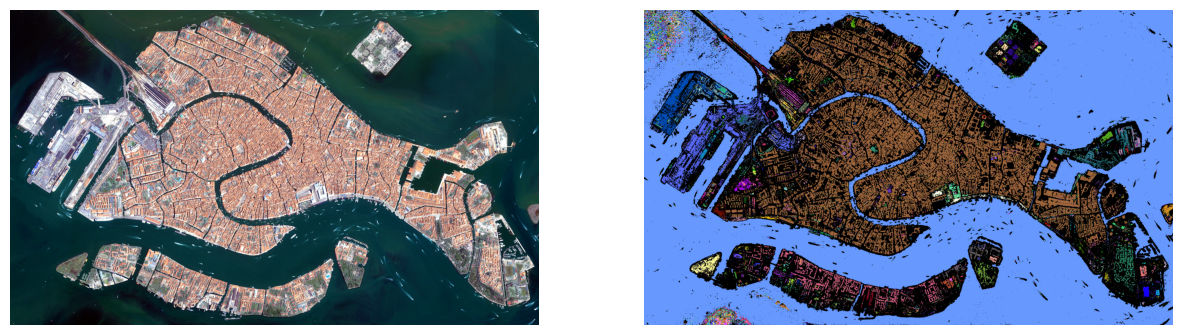

In [ ]:
image = Image.open("DBSCAN/image.png")
process_image_optimized(image, 0.025 ,10,0.5,True,True)

Finally, here are our results when we apply each step of preprocessing for DBSCAN. We have a logical cluster: the whole city is in the same color, the islands are in a different color, and the sea and the river are clustered in the same color. We can see that the train station is also well-clustered. To conclude, I'm really proud of this work because I spent a lot of time searching for ways to improve the results of DBSCAN image segmentation, and I finally achieved results that are really good. I'm very happy with this work, and I hope you will enjoy it!